## ML regression to predict the Efficacy of an active G9a inhibitor: Dataset 4 (skewness removed)

### Content   <a name="content"></a>

1. [Load data](#1)
2. [Regression Machine Learning](#2)
3. [Cros-validation](#3)
4. [Calculate the relative error of the Gradient Boosting Regressor model](#4)
5. [Feature importance of the Gradient Boosting Regressor model](#5)
6. [Comparison of the first six features from the feature importance results](#6)
7. [Hyperparameter tuning of the model with the reduced features](#7)
8. [Relative error of the reduced data model](#8)

## Load data<a name="1"></a>

In [1]:
# pip install modin[ray] 
# pip install sidetable

In [2]:
import pandas as pd 

# # loading the dataset for the regression ML
df = pd.read_csv('data_reg_no_skew_1.csv', index_col=[0])
# Avoid some columns to be truncated during df display
pd.set_option('display.max_columns', None)
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (3890, 34)


,MMY6_3D,HBAC,H,O,MMX,TPSA,MMX6,MMX_3D,mean_H_rel**allAtoms_rel_3D,MMX6_3D,MMY,SX6,MMY6,SX,SY6,Similarity_2,Similarity_1,SX6_3D,Similarity_3,CBUC,MMZ6_3D,SY6_3D,SY,SY_3D,SX_3D,HAC,Solubility_at_pH_7_4,SZ6_3D,MW,C_relative,H_relative,C,XL,Efficacy
0,2.4360,3,3.95,7.83,7.5474,65.7,6.7974,10.5630,0.030670,8.3102,8.1460,0.376629,7.0497,-0.072167,-0.504151,0.143,0.144,0.577461,0.143,1,0.5125,-0.220340,-0.082983,-0.201219,0.225054,14,24.2,0.219066,204.25,0.45,0.36,58.81,2.5,130.562
1,5.8663,3,6.41,0.00,5.8167,88.0,5.6245,10.3446,0.254298,8.5139,9.7902,-0.557722,8.9085,-0.500673,-0.246276,0.266,0.294,-0.631721,0.250,1,1.9500,0.287385,-0.343703,0.208560,-0.389547,17,30.8,0.139985,267.40,0.35,0.50,53.90,4.0,123.936
2,7.1433,2,6.63,9.57,7.5260,49.4,7.5260,9.6245,0.321708,7.4089,10.9525,0.465461,10.9525,0.573640,0.399710,0.373,0.386,-0.144368,0.362,1,3.6653,0.267255,0.421623,0.044842,-0.355991,25,43.9,0.233650,334.40,0.45,0.47,75.42,2.9,131.956
3,2.9969,2,5.83,7.12,10.6260,41.1,9.5867,10.3408,0.208307,8.2529,4.1932,-0.162607,3.0000,-0.072486,-0.215161,0.134,0.145,0.135432,0.143,1,1.4122,-0.077788,-0.008622,-0.098331,-0.202140,15,11.5,-0.509201,224.68,0.39,0.46,58.80,3.0,130.878
4,4.8208,5,5.15,17.50,7.5259,103.0,6.4866,11.7014,0.184960,9.6783,9.7579,-0.559559,9.0079,-0.360663,-0.164095,0.295,0.296,-0.009474,0.285,1,2.7979,0.456132,-0.418338,0.196650,0.225940,20,2.8,-1.126808,274.28,0.38,0.41,56.93,1.4,115.735


In [3]:
# Check for NaN
df.isnull().values.any()

False

In [4]:
df.describe(include="all")

,MMY6_3D,HBAC,H,O,MMX,TPSA,MMX6,MMX_3D,mean_H_rel**allAtoms_rel_3D,MMX6_3D,MMY,SX6,MMY6,SX,SY6,Similarity_2,Similarity_1,SX6_3D,Similarity_3,CBUC,MMZ6_3D,SY6_3D,SY,SY_3D,SX_3D,HAC,Solubility_at_pH_7_4,SZ6_3D,MW,C_relative,H_relative,C,XL,Efficacy
count,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.0,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000,3890.000000
mean,4.622067,4.268123,5.194190,11.088846,10.286804,79.775416,9.596785,12.306994,0.182918,10.221921,8.763759,0.025353,8.158382,0.023352,-0.052072,0.277494,0.285496,0.008828,0.268793,1.0,2.297309,0.003001,-0.024514,0.000904,0.017040,20.894859,24.361632,-0.006760,299.861143,0.414787,0.416226,60.254805,2.744679,132.911167
std,1.468863,1.540684,1.503441,7.417339,2.751989,31.013529,2.911908,2.368003,0.085113,2.442560,2.710905,0.303721,2.887211,0.268670,0.365724,0.068609,0.076150,0.324426,0.061669,0.0,1.103894,0.442323,0.298293,0.292514,0.259901,3.446987,17.227432,0.585349,46.148193,0.045202,0.067071,9.460849,1.136054,29.294427
min,0.394700,1.000000,0.890000,0.000000,2.605200,3.200000,1.963500,4.589300,0.003183,2.145400,1.950000,-1.212065,0.750000,-0.877719,-1.308379,0.042000,0.040000,-1.465220,0.050000,1.0,0.000300,-2.090206,-1.071139,-1.113708,-0.917542,7.000000,0.100000,-3.102060,97.070000,0.170000,0.140000,20.830000,-3.700000,62.000400
25%,3.483700,3.000000,4.120000,5.400000,8.485000,58.900000,7.541100,10.608550,0.122392,8.530900,6.739075,-0.166488,5.987450,-0.143731,-0.282742,0.231000,0.232000,-0.185455,0.228000,1.0,1.589575,-0.260382,-0.223614,-0.176874,-0.146116,19.000000,6.300000,-0.268120,271.302500,0.380000,0.370000,53.982500,2.000000,112.493500
50%,4.533750,4.000000,5.080000,10.645000,10.114800,78.500000,9.146600,12.184750,0.179361,10.099200,8.707100,0.004392,7.918750,0.004040,-0.043705,0.278000,0.285000,0.002707,0.270000,1.0,2.417650,0.000414,-0.024694,0.002960,0.018748,21.000000,25.800000,-0.001453,303.400000,0.420000,0.420000,60.600000,2.800000,131.586500
75%,5.591700,5.000000,6.140000,15.585000,12.032875,98.500000,11.454400,13.804700,0.241317,11.753475,10.808025,0.198907,9.916600,0.181786,0.185260,0.325000,0.339000,0.199701,0.312000,1.0,2.901050,0.269311,0.186429,0.181224,0.189755,23.000000,39.700000,0.258958,329.500000,0.440000,0.460000,66.877500,3.500000,151.599750
max,11.336500,11.000000,10.740000,39.110000,22.867300,206.000000,22.867300,21.153000,0.488617,18.383800,18.601500,1.221301,18.601500,1.064085,1.471536,0.606000,0.549000,1.360924,0.551000,1.0,6.912600,1.920991,1.017549,1.247962,0.889557,42.000000,68.800000,3.854187,575.700000,0.560000,0.610000,86.050000,6.000000,289.972000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3890 entries, 0 to 3889
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MMY6_3D                      3890 non-null   float64
 1   HBAC                         3890 non-null   int64  
 2   H                            3890 non-null   float64
 3   O                            3890 non-null   float64
 4   MMX                          3890 non-null   float64
 5   TPSA                         3890 non-null   float64
 6   MMX6                         3890 non-null   float64
 7   MMX_3D                       3890 non-null   float64
 8   mean_H_rel**allAtoms_rel_3D  3890 non-null   float64
 9   MMX6_3D                      3890 non-null   float64
 10  MMY                          3890 non-null   float64
 11  SX6                          3890 non-null   float64
 12  MMY6                         3890 non-null   float64
 13  SX                     

[<a href="#content">Back to top</a>]

## Regression Machine Learning <a name="2"></a>

In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separate the training columns from the target column 'Fit_HillSlope'
X = df.drop(['Efficacy'], axis=1) 
y = df['Efficacy'] 

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=5) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (3112, 33)
X_test:   (778, 33)
y_train:  (3112,)
y_test:   (778,)


In [7]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the algorithms that will be used, placing them in a dictionary 
regs = {"SVR":SVR(kernel='linear'),
        "DecisionTree":DecisionTreeRegressor(), 
        "RandomForest":RandomForestRegressor(), 
        "GradientBoost":GradientBoostingRegressor(),}

In [8]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create statistics with the results of training with different algorithms
def model_fit(regs):
    fitted_model={}
    model_result = pd.DataFrame()
    for model_name, model in regs.items():
        model.fit(X_train,y_train)
        fitted_model.update({model_name:model})
        model_dict = {}
        model_dict['Algorithm'] = model_name
        model_dict['RMSE_Train'] = round(root_mean_squared_error(y_train, model.predict(X_train)),2)
        model_dict['RMSE_Test'] = round(root_mean_squared_error(y_test, model.predict(X_test)),2)
        model_dict['MAE_Train'] = round(mean_absolute_error(y_train, model.predict(X_train)),2)
        model_dict['MAE_Test'] = round(mean_absolute_error(y_test, model.predict(X_test)),2)
        model_dict['R2_Train'] = round(r2_score(y_train, model.predict(X_train)),2)
        model_dict['R2_Test'] = round(r2_score(y_test, model.predict(X_test)),2)
        model_result = model_result._append(model_dict,ignore_index=True)
    return fitted_model, model_result

fitted_model, model_result = model_fit(regs)
model_result.sort_values(by=['MAE_Test'],ascending=True)

,Algorithm,RMSE_Train,RMSE_Test,MAE_Train,MAE_Test,R2_Train,R2_Test
2,RandomForest,10.98,27.08,8.55,21.16,0.86,0.08
3,GradientBoost,25.51,27.04,20.17,21.29,0.25,0.08
0,SVR,29.14,27.75,22.77,21.97,0.03,0.03
1,DecisionTree,0.00,38.97,0.00,30.15,1.00,-0.91


[<a href="#content">Back to top</a>]

## Cross-validation <a name="3"></a>

In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Create statistics with the results of cross-validation
def model_CV(regs):
    fitted_model={}
    model_cv_result = pd.DataFrame()
    for model_name, model in regs.items():
        fitted_model.update({model_name:model})
        scores = cross_val_score(model, X_train, y_train, cv=5,
                        scoring=('neg_mean_absolute_error'))
        scores = -scores
        model_dict = {}
        model_dict['Algorithm'] = model_name
        model_dict['CV_MAE'] = round(np.mean(scores), 2)
        model_dict['Sta Dev MAE'] = round(np.std(scores), 2)
        model_dict['List of MAE'] = np.round(scores, 2)
        model_cv_result = model_cv_result._append(model_dict,ignore_index=True)
    return fitted_model, model_cv_result

fitted_model, model_cv_result = model_CV(regs)
model_cv_result.sort_values(by=['CV_MAE'],ascending= True)

,Algorithm,CV_MAE,Sta Dev MAE,List of MAE
2,RandomForest,22.97,0.78,"[23.82, 21.79, 22.89, 23.82, 22.53]"
3,GradientBoost,23.08,0.85,"[23.67, 21.54, 23.35, 23.94, 22.9]"
0,SVR,23.14,0.68,"[23.5, 21.95, 23.2, 24.02, 23.02]"
1,DecisionTree,33.21,0.95,"[34.71, 33.79, 32.64, 32.96, 31.97]"


[<a href="#content">Back to top</a>]

## Calculate the relative error of the Gradient Boosting Regressor model  <a name="4"></a>

In [10]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

# Instantiate and train a model
model = GradientBoostingRegressor().fit(X_train, y_train)

# Predict 
pred = model.predict(X_test)

# Evaluate
print('Mean Absolute Error_train (MAE): ', round(mean_absolute_error(y_train, model.predict(X_train)),2))
print('Mean Absolute Error_test (MAE): ', round(mean_absolute_error(y_test, model.predict(X_test)),2))
print('Root Mean Squared Error_train (RMSE):', round(root_mean_squared_error(y_train, model.predict(X_train)),2))
print('Root Mean Squared Error_test (RMSE):', round(root_mean_squared_error(y_test, model.predict(X_test)),2))
print('R-squared_train (R2):', round(r2_score(y_train, model.predict(X_train)),2))
print('R-squared_test (R2):', round(r2_score(y_test, model.predict(X_test)),2))

Mean Absolute Error_train (MAE):  20.17
Mean Absolute Error_test (MAE):  21.32
Root Mean Squared Error_train (RMSE): 25.51
Root Mean Squared Error_test (RMSE): 27.06
R-squared_train (R2): 0.25
R-squared_test (R2): 0.08


In [11]:
# Create a data frame with the test values 
data_verify=pd.DataFrame(y_test.tolist(),columns=["Real Values"])

# Create a data frame with the values predicted 
data_predicted=pd.DataFrame(pred.tolist(),columns=["Predicted Values"])

# Concatenate the data frames with the test and the values predicted
final_output=pd.concat([data_verify,data_predicted],axis=1)

# Create column with the difference between the test and prediction values
final_output["Difference"]= np.abs(final_output["Real Values"]-final_output["Predicted Values"])
final_output["Relative proportion Difference/Real Value"]= (final_output["Difference"]/final_output["Real Values"])

# Display the resulted data frame 
final_output

,Real Values,Predicted Values,Difference,Relative proportion Difference/Real Value
0,133.9060,131.435248,2.470752,0.018451
1,106.7490,153.646017,46.897017,0.439320
2,73.8972,125.654903,51.757703,0.700401
3,131.3220,144.925191,13.603191,0.103587
4,128.1160,132.452877,4.336877,0.033851
...,...,...,...,...
773,152.0050,157.069254,5.064254,0.033316
774,138.4730,126.716671,11.756329,0.084900
775,134.5040,127.588663,6.915337,0.051414
776,114.2020,131.495336,17.293336,0.151428


In [12]:
# Mean of the relative error
df_reg_rel_mean = final_output["Relative proportion Difference/Real Value"].mean()
print("Relative error: ", df_reg_rel_mean)

Relative error:  0.17750283691380475


In [13]:
mean_ = np.mean(final_output["Relative proportion Difference/Real Value"])
print('Relative proportion Difference/Real Value: ', mean_)

print("From 0 to 0.1:   ", len(final_output[final_output["Relative proportion Difference/Real Value"] <= 0.1]))
print("From 0.1 to 0.2: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.1) & (final_output["Relative proportion Difference/Real Value"] <=0.2)]))
print("From 0.2 to 0.3: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.2) & (final_output["Relative proportion Difference/Real Value"] <=0.3)]))
print("From 0.3 to 0.4: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.3) & (final_output["Relative proportion Difference/Real Value"] <=0.4)]))
print("From 0.4 to 0.5: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.4) & (final_output["Relative proportion Difference/Real Value"] <=0.5)]))
print("From 0.5 to 0.6: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.5) & (final_output["Relative proportion Difference/Real Value"] <=0.6)]))
print("From 0.6 to 0.7: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.6) & (final_output["Relative proportion Difference/Real Value"] <=0.7)]))
print("From 0.7 to 0.8: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.7) & (final_output["Relative proportion Difference/Real Value"] <=0.8)]))
print("From 0.8 to 0.9: ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.8) & (final_output["Relative proportion Difference/Real Value"] <=0.9)]))
print("From 0.9 to 1:   ",len(final_output[(final_output["Relative proportion Difference/Real Value"] > 0.9) & (final_output["Relative proportion Difference/Real Value"] <=1)]))

Relative proportion Difference/Real Value:  0.17750283691380475
From 0 to 0.1:    312
From 0.1 to 0.2:  224
From 0.2 to 0.3:  108
From 0.3 to 0.4:  55
From 0.4 to 0.5:  32
From 0.5 to 0.6:  22
From 0.6 to 0.7:  11
From 0.7 to 0.8:  8
From 0.8 to 0.9:  4
From 0.9 to 1:    2


[<a href="#content">Back to top</a>]

## Feature importance of the Gradient Boosting Regressor model <a name="5"></a>

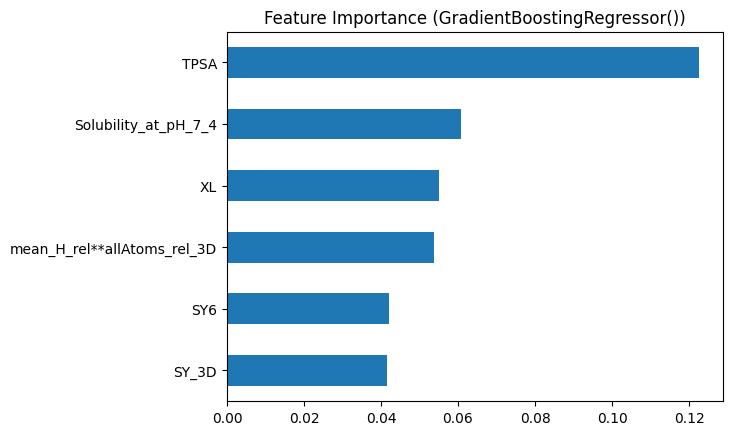

In [14]:
import matplotlib.pyplot as plt

# Define feature importance of the Gradient Boosting Regressor 
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp = feat_imp.nlargest(6).sort_values()

# Plot feature importance of RandomForestClassifier 
feat_imp.plot(kind="barh", title="Feature Importance ({:})".format(model))
plt.show()

Text(0.5, 0, 'Permutation Importance')

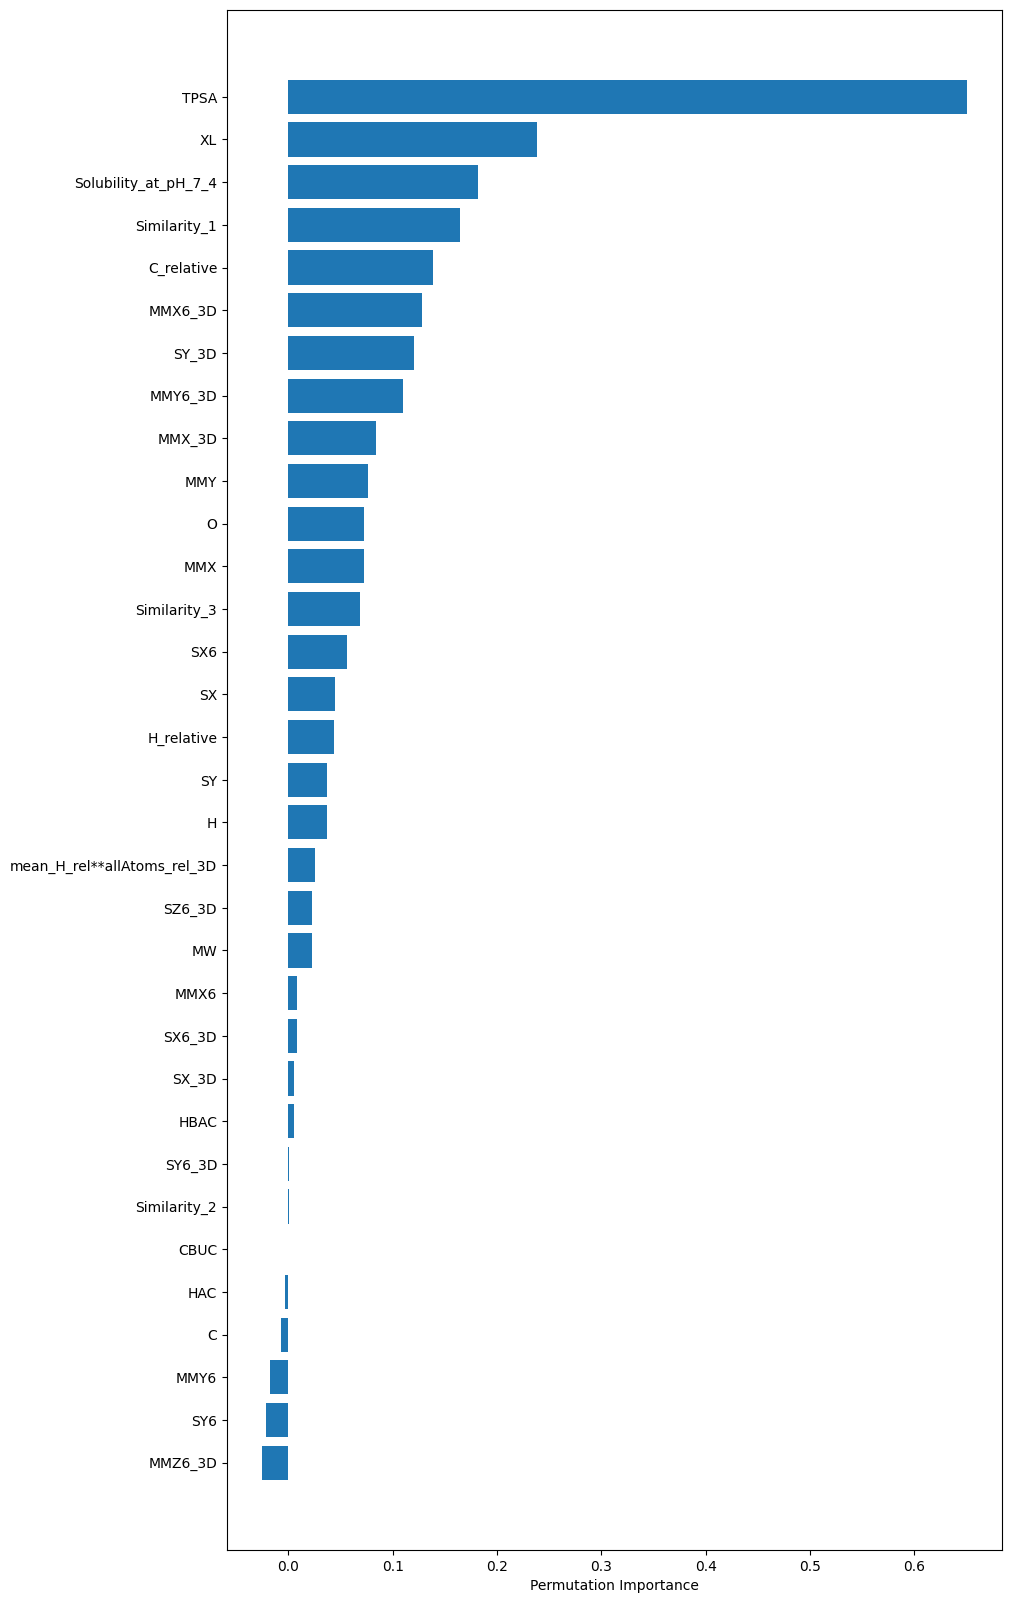

In [15]:
from sklearn.inspection import permutation_importance

# Instantiate and train the model
model = GradientBoostingRegressor().fit(X_train, y_train)

# Create a list of the column names
feature_names = list(X)

# Convert the list into an array
features = np.array(feature_names)

# Calculate the permutation feature importance
perm_importance = permutation_importance(model, X_test, y_test,
                                         scoring='neg_mean_absolute_error',
                                         random_state=0)

# Sort the result
sorted_idx = perm_importance.importances_mean.argsort()

# Plot the permutation feature importance
plt.figure(figsize=(10,20))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

[<a href="#content">Back to top</a>]

## Comparison of the first six features from the feature importance results <a name="6"></a>

In [16]:
import numpy as np
from sklearn import metrics

# Explore the first eleven feature from permutation importance for SVR with rdf kernel 
X = df[['TPSA',                              # 21.93
        'Solubility_at_pH_7_4',              # 21.8
        'XL',                                # 21.48
        # 'mean_H_rel**allAtoms_rel_3D',       # 21.72
        # 'SY6',                               # 21.88
        # 'SY_3D',                             # 21.88          
       ]]

y = df['Efficacy'] # from In[6]

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=5) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Instantiate and train a model
model = GradientBoostingRegressor().fit(X_train, y_train)

# Predict 
pred = model.predict(X_test)

# Evaluate
print('Mean Absolute Error_train (MAE): ', round(mean_absolute_error(y_train, model.predict(X_train)),2))
print('Mean Absolute Error_test (MAE): ', round(mean_absolute_error(y_test, model.predict(X_test)),2))
print('Root Mean Squared Error_train (RMSE):', round(root_mean_squared_error(y_train, model.predict(X_train)),2))
print('Root Mean Squared Error_test (RMSE):', round(root_mean_squared_error(y_test, model.predict(X_test)),2))
print('R-squared_train (R2):', round(r2_score(y_train, model.predict(X_train)),2))
print('R-squared_test (R2):', round(r2_score(y_test, model.predict(X_test)),2))

Mean Absolute Error_train (MAE):  21.37
Mean Absolute Error_test (MAE):  21.48
Root Mean Squared Error_train (RMSE): 27.08
Root Mean Squared Error_test (RMSE): 27.39
R-squared_train (R2): 0.16
R-squared_test (R2): 0.06


In [17]:
# Explore the first eleven feature from permutation importance for SVR with linear kernel 
# X = df[['TPSA',                      # 21.93
        # 'XL',                        # 21.87
        # 'Similarity_1',              # 22.44
        # 'Solubility_at_pH_7_4',      # 21.41
        # 'C_relative',                # 22.39
        # 'MMY6_3D',                   # 21.43
      # ]]

# y = df['Efficacy'] # from In[6]

# # Split the data set into train and test parts 
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.20,
#                                                     random_state=5) 
# # # Standardise the data points
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# # Instantiate and train a model
# model = GradientBoostingRegressor().fit(X_train, y_train)

# # Predict 
# pred = model.predict(X_test)

# # Evaluate
# print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, pred),2))
# print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 2))
# print('R-squared (R2):', round(r2_score(y_test, model.predict(X_test)),2))

In [18]:
# Create a data frame with the test values 
data_verify=pd.DataFrame(y_test.tolist(),columns=["Real Values"])

# Create a data frame with the values predicted 
data_predicted=pd.DataFrame(pred.tolist(),columns=["Predicted Values"])

# Concatenate the data frames with the test and the values predicted
final_output=pd.concat([data_verify,data_predicted],axis=1)

# Create column with the difference between the test and prediction values
final_output["Difference"]= np.abs(final_output["Real Values"]-final_output["Predicted Values"])
final_output["Relative proportion Difference/Real Value"]= (final_output["Difference"]/final_output["Real Values"])

# Display the resulted data frame 
final_output

,Real Values,Predicted Values,Difference,Relative proportion Difference/Real Value
0,133.9060,133.506714,0.399286,0.002982
1,106.7490,152.727931,45.978931,0.430720
2,73.8972,135.784017,61.886817,0.837472
3,131.3220,158.762719,27.440719,0.208958
4,128.1160,128.472402,0.356402,0.002782
...,...,...,...,...
773,152.0050,172.046259,20.041259,0.131846
774,138.4730,127.126786,11.346214,0.081938
775,134.5040,138.022883,3.518883,0.026162
776,114.2020,137.508092,23.306092,0.204078


In [19]:
# Mean of the r# Mean of the relative error
df_reg_rel_mean = final_output["Relative proportion Difference/Real Value"].mean()
df_reg_rel_mean 

0.17811813635001086

[<a href="#content">Back to top</a>]

## Hyperparameter tuning of the model with the reduced features  <a name="7"></a>

In [20]:
import pprint as pp

# Currentlly used parameters
pp.pprint(model.get_params())

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) # Use appropriate scoring metric
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_gbr = grid_search.best_estimator_

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [22]:
# Train the model with the new hyperparameter vakues 
model = GradientBoostingRegressor(learning_rate=0.01, 
                                  max_depth=3,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=200).fit(X_train, y_train)

# Predict 
pred = model.predict(X_test)

# Evaluate
print('Mean Absolute Error_train (MAE): ', round(mean_absolute_error(y_train, model.predict(X_train)),2))
print('Mean Absolute Error_test (MAE): ', round(mean_absolute_error(y_test, model.predict(X_test)),2))
print('Root Mean Squared Error_train (RMSE):', round(root_mean_squared_error(y_train, model.predict(X_train)),2))
print('Root Mean Squared Error_test (RMSE):', round(root_mean_squared_error(y_test, model.predict(X_test)),2))
print('R-squared_train (R2):', round(r2_score(y_train, model.predict(X_train)),2))
print('R-squared_test (R2):', round(r2_score(y_test, model.predict(X_test)),2))

Mean Absolute Error_train (MAE):  22.49
Mean Absolute Error_test (MAE):  21.64
Root Mean Squared Error_train (RMSE): 28.47
Root Mean Squared Error_test (RMSE): 27.56
R-squared_train (R2): 0.07
R-squared_test (R2): 0.04


[<a href="#content">Back to top</a>]

## Relative error of the reduced data model. <a name="8"></a>

In [23]:
# Create a data frame with the test values 
data_verify=pd.DataFrame(y_test.tolist(),columns=["Real Values"])

# Create a data frame with the values predicted 
data_predicted=pd.DataFrame(pred.tolist(),columns=["Predicted Values"])

# Concatenate the data frames with the test and the values predicted
final_output=pd.concat([data_verify,data_predicted],axis=1)

# Create column with the difference between the test and prediction values
final_output["Difference"]= np.abs(final_output["Real Values"]-final_output["Predicted Values"])
final_output["Relative proportion Difference/Real Value"]= (final_output["Difference"]/final_output["Real Values"])

# Display the resulted data frame 
final_output

,Real Values,Predicted Values,Difference,Relative proportion Difference/Real Value
0,133.9060,131.935392,1.970608,0.014716
1,106.7490,148.130475,41.381475,0.387652
2,73.8972,132.355828,58.458628,0.791080
3,131.3220,139.888227,8.566227,0.065231
4,128.1160,130.236447,2.120447,0.016551
...,...,...,...,...
773,152.0050,137.336580,14.668420,0.096500
774,138.4730,129.990210,8.482790,0.061260
775,134.5040,134.270007,0.233993,0.001740
776,114.2020,136.482124,22.280124,0.195094


In [24]:
# Mean of the r# Mean of the relative error
df_reg_rel_mean = final_output["Relative proportion Difference/Real Value"].mean()
df_reg_rel_mean 

0.1795485671086662

[<a href="#content">Back to top</a>]